An extremely simply example of a moving average cross trading strategy on Bitcoin. This can be adapted to long only or long short in the vectorized evaluation of strategy section.


In [1]:
#libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import matplotlib.dates as mdates
style.use ('ggplot')
import numpy as np

#import our data and select dates
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,6,6)
df = web.DataReader('BTC-USD','yahoo',start,end)
df.to_csv('BTC.csv')
df = pd.read_csv('BTC.csv', parse_dates = True, index_col=0)

#visualise data as a check
df.shape

(3247, 6)

In [2]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0,0.04951
2010-07-17,0.08585,0.05941,0.04951,0.08584,5,0.08584
2010-07-18,0.09307,0.07723,0.08584,0.08080,49,0.08080
2010-07-19,0.08181,0.07426,0.08080,0.07474,20,0.07474
2010-07-20,0.07921,0.06634,0.07474,0.07921,42,0.07921


In [3]:
df['SMA50'] = df['Adj Close'].rolling(window=50).mean()
df['SMA252'] = df['Adj Close'].rolling(window=252).mean()
df.dropna(inplace=True)

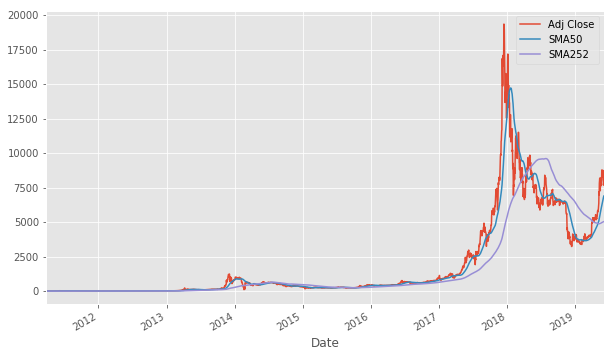

In [4]:
df[['Adj Close', 'SMA50', 'SMA252']].plot(figsize=(10, 6));

In [5]:
# vectorized evaluation of the trading condition/signal generation
df['position'] = np.where(df['SMA50'] > df['SMA252'], 1, 0)#0 means long only, -1 is short
# vectorized calculation of log returns
df['market'] = np.log(df['Close'] / df['Close'].shift(1))
# vectorized calculation of strategy returns
df['strategy'] = df['position'].shift(1) * df['market']
df[['market', 'strategy']].cumsum().apply(np.exp).head()

,market,strategy
Date,,
2011-03-25,NaN,NaN
2011-03-26,0.967640,0.967640
2011-03-27,0.927812,0.927812
2011-03-27,0.904051,0.904051
2011-03-28,0.896696,0.896696


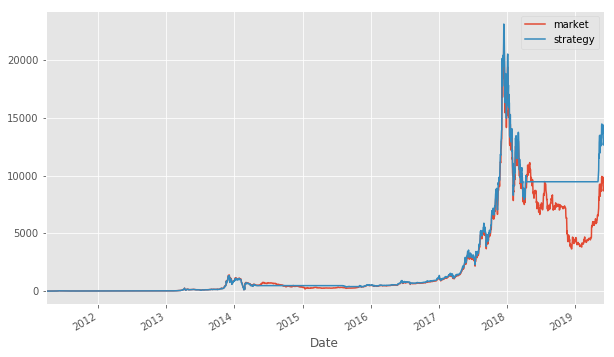

In [6]:
df[['market', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

It can be seen the long only strategy outperforms buy and hold. This is replicated in the long short strategy. It should be noted that other tests show that this style of strategy is not particularly useful on equity indexes or commodities. This strategy performs well on volatile trending assets. Essentially it is just a crude momentum signal. 